# Data Cleaning and Preprocessing

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

load the data by using read_csv 

In [73]:
data = pd.read_csv("MY_FINAL_.csv")

values outside the device range is omited 

In [74]:
condition = (
    (df['Sph-ABB-R'] > 14) | (df['Sph-ABB-R'] < -14) |
    (df['Cyl-ABB-R'] > 14) | (df['Cyl-ABB-R'] < -14) |
    (df['Cyl-ABB-L'] > 14) | (df['Cyl-ABB-L'] < -14) |
    (df['Sph-ABB-L'] > 14) | (df['Sph-ABB-L'] < -14)
)
df_cleaned = df[~condition]

the .describe function is used to describe valuable information of the data

In [75]:
df_cleaned.describe()

,ID,Sph-ABB-R,Cyl-ABB-R,Ax-ABB-R,Sph-ABB-L,Cyl-ABB-L,Ax-ABB-L,Sph-SR-R,Cyl-SR-R,Ax-SR-R,Sph-SR-L,Cyl-SR-L,Ax-SR-L,Sph-DIFF-R,Cyl-DIFF-R,Ax-DIFF-R,Sph-DIFF-L,Cyl-DIFF-L,Ax-DIFF-L
count,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000
mean,12115.483775,-0.379056,-0.334102,43.452813,-0.364022,-0.317431,49.305448,-0.310435,-0.162772,27.379577,-0.299047,-0.141858,26.366478,0.137541,0.173564,13.215243,0.148184,0.181230,13.910092
std,4249.673085,1.157562,0.552854,57.625892,1.176892,0.547336,62.439533,1.111085,0.418790,53.216480,1.114146,0.386415,53.566366,0.553417,0.351891,25.588996,0.598024,0.380086,26.330814
min,6354.000000,-8.000000,-5.000000,0.000000,-12.000000,-5.000000,0.000000,-9.000000,-3.000000,0.000000,-12.000000,-3.000000,0.000000,-9.000000,-2.000000,0.000000,-9.000000,-1.750000,0.000000
25%,8380.000000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,0.000000,-0.500000,0.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11248.000000,-0.250000,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
75%,15389.000000,0.000000,0.000000,90.000000,0.000000,0.000000,92.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.250000,0.250000,10.000000,0.250000,0.250000,10.500000
max,21678.000000,7.000000,5.000000,180.000000,10.500000,2.750000,180.000000,3.500000,5.000000,180.000000,3.500000,2.750000,180.000000,7.000000,4.000000,90.000000,10.500000,5.000000,90.000000


then histogram plots are ploted to visualize and analyze the data

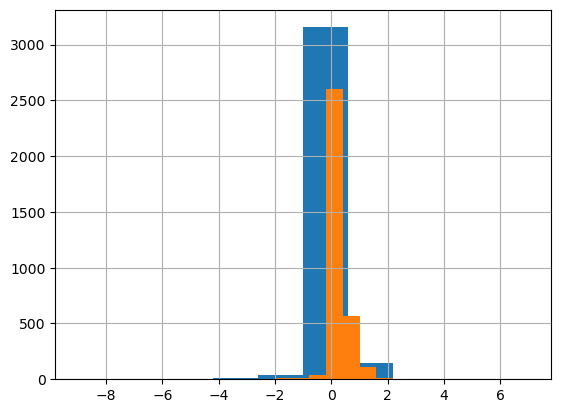

In [76]:
df_cleaned["Sph-DIFF-R"].hist();
df_cleaned["Cyl-DIFF-R"].hist();

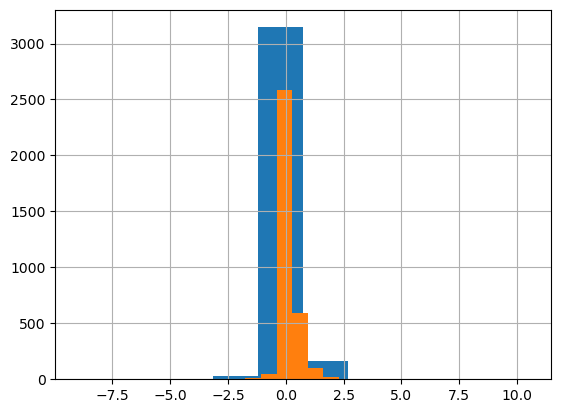

In [77]:
df_cleaned["Sph-DIFF-L"].hist();
df_cleaned["Cyl-DIFF-L"].hist();

now this chunk of codes will perform outlier removal by calculating z score values for all the components and removes the outlier data above the +-3 standard deviation to abide the emprical rule.

In [80]:
from scipy import stats

# Define a function to remove outliers based on z-scores
def remove_outliers(df, column, threshold=3):
    # Calculate the z-score for the specified column
    df[f"z_score_{column}"] = stats.zscore(df[column], ddof=1)
    
    # Identify outliers beyond the specified threshold
    outliers = df[(df[f"z_score_{column}"] > threshold) | (df[f"z_score_{column}"] < -threshold)]
    
    # Print identified outliers
    if not outliers.empty:
        print(f"Outliers detected in '{column}':")
        print(outliers)
    
    # Remove outliers
    df_no_outliers = df.drop(outliers.index)
    
    # Reset the index and drop the z-score column to clean up
    df_no_outliers = df_no_outliers.reset_index(drop=True)
    df_no_outliers = df_no_outliers.drop(columns=[f"z_score_{column}"])
    
    return df_no_outliers

# Remove outliers sequentially for 'Sph-DIFF-R' and 'Cyl-DIFF-R'
df_cleaned_no_outliers = df_cleaned.copy()
for column in ["Sph-DIFF-R", "Cyl-DIFF-R", "Sph-DIFF-L", "Cyl-DIFF-L","Ax-DIFF-R","Ax-DIFF-L"]:
    df_cleaned_no_outliers = remove_outliers(df_cleaned_no_outliers, column)

# Display the final result
df_cleaned_no_outliers.describe()


Outliers detected in 'Sph-DIFF-R':
         ID  Sph-ABB-R  Cyl-ABB-R  Ax-ABB-R  Sph-ABB-L  Cyl-ABB-L  Ax-ABB-L  \
24     6416       0.00       0.00         0       0.00       0.00         0   
40     6464       0.00       0.00         0       0.00       0.00         0   
43     6470       0.00       0.00         0       0.00       0.00         0   
124    6701       0.00       0.00         0       0.00       0.00         0   
138    6727       0.00       0.00         0       0.00       0.00         0   
166    6806       0.00       0.00         0       0.00       0.00         0   
172    6822       4.75      -3.75        47       0.25      -0.75       127   
173    6825      -8.00      -1.75        47       0.50      -1.25        85   
190    6872       0.00       0.00         0       0.00       0.00         0   
202    6911      -5.00      -2.25       110      -2.00      -1.50        49   
224    6956       0.00       0.00         0       0.00       0.00         0   
230    6965      

,ID,Sph-ABB-R,Cyl-ABB-R,Ax-ABB-R,Sph-ABB-L,Cyl-ABB-L,Ax-ABB-L,Sph-SR-R,Cyl-SR-R,Ax-SR-R,Sph-SR-L,Cyl-SR-L,Ax-SR-L,Sph-DIFF-R,Cyl-DIFF-R,Ax-DIFF-R,Sph-DIFF-L,Cyl-DIFF-L,Ax-DIFF-L
count,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.00000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.00000,2975.000000,2975.000000,2975.000000,2975.000000
mean,12300.917311,-0.398739,-0.294958,40.500504,-0.383782,-0.277899,46.53916,-0.301092,-0.159748,25.792605,-0.285294,-0.140420,25.361345,0.162689,0.14916,9.229580,0.170756,0.149244,9.450084
std,4180.437646,1.106840,0.505409,57.835527,1.111890,0.486946,63.05955,1.021702,0.396380,52.177246,1.018003,0.372157,52.742872,0.251598,0.24865,19.856074,0.228391,0.247710,20.140281
min,6354.000000,-7.000000,-3.000000,0.000000,-12.000000,-3.000000,0.00000,-7.000000,-3.000000,0.000000,-12.000000,-3.000000,0.000000,-1.500000,-0.75000,0.000000,-0.750000,-0.750000,0.000000
25%,8637.500000,-0.750000,-0.500000,0.000000,-0.500000,-0.500000,0.00000,-0.500000,0.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,11537.000000,-0.250000,0.000000,0.000000,-0.250000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.250000,0.000000,0.000000
75%,15477.500000,0.000000,0.000000,83.000000,0.000000,0.000000,92.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.25000,5.000000,0.250000,0.250000,5.000000
max,21678.000000,5.000000,5.000000,180.000000,3.500000,2.750000,180.00000,3.500000,5.000000,180.000000,3.500000,2.750000,180.000000,1.750000,1.00000,86.000000,1.250000,1.000000,82.000000


now we find mean,standard deviation and percentage of values that fall within 1,2 and 3 standard deviation for all the components 

In [81]:
# Define the columns to process
columns = ["Sph-DIFF-R", "Cyl-DIFF-R", "Sph-DIFF-L", "Cyl-DIFF-L","Ax-DIFF-R","Ax-DIFF-L"]

# Loop through each column and perform the calculations
for column in columns:
    print(f"\n--- Processing {column} ---")
    
    # Calculate the mean and standard deviation
    mean_value = df_cleaned[column].mean()
    print(f"Mean of {column}: {mean_value}")
    
    std_value = df_cleaned[column].std()
    print(f"Standard deviation of {column}: {std_value}")
    
    # Calculate the limits for 1, 2, and 3 standard deviations
    for std_multiplier in range(1, 4):
        lower_limit = mean_value - std_multiplier * std_value
        upper_limit = mean_value + std_multiplier * std_value
        print(f"{std_multiplier} Std Dev Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")
        
        # Calculate the percentage of values within the limits
        std_percentage = ((df_cleaned[column] >= lower_limit) & (df_cleaned[column] <= upper_limit)).mean() * 100
        print(f"Percentage of values within {std_multiplier} standard deviation(s) for {column}: {std_percentage:.2f}%")


--- Processing Sph-DIFF-R ---
Mean of Sph-DIFF-R: 0.13754093480202442
Standard deviation of Sph-DIFF-R: 0.5534170446320619
1 Std Dev Lower Limit: -0.4158761098300374, Upper Limit: 0.6909579794340863
Percentage of values within 1 standard deviation(s) for Sph-DIFF-R: 92.68%
2 Std Dev Lower Limit: -0.9692931544620993, Upper Limit: 1.2443750240661482
Percentage of values within 2 standard deviation(s) for Sph-DIFF-R: 97.05%
3 Std Dev Lower Limit: -1.5227101990941612, Upper Limit: 1.79779206869821
Percentage of values within 3 standard deviation(s) for Sph-DIFF-R: 98.81%

--- Processing Cyl-DIFF-R ---
Mean of Cyl-DIFF-R: 0.173563560583507
Standard deviation of Cyl-DIFF-R: 0.35189119116122813
1 Std Dev Lower Limit: -0.17832763057772114, Upper Limit: 0.5254547517447351
Percentage of values within 1 standard deviation(s) for Cyl-DIFF-R: 89.73%
2 Std Dev Lower Limit: -0.5302188217389493, Upper Limit: 0.8773459429059632
Percentage of values within 2 standard deviation(s) for Cyl-DIFF-R: 95.39%

finally the cleaned data is exported to the desiginated path

In [82]:
df_cleaned_no_outliers.to_csv('C:/forus data/PROJECT 1/Clean Data/CSV DATA/df_cleaned_no_outliers1.csv', index=False)